<a href="https://colab.research.google.com/github/i-ninte/data-analytics-R-python/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## READING THE DATASET

In [2]:
df = pd.read_csv("weather.csv")

#PREVIEWING THE FIRST 5 ROWS

In [ ]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## CHECKING FOR ERRORS

In [ ]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

#GENERAL INFO AND STATS OF THE DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## CHECKING THE NUMBER OF ENTERIES

In [ ]:
df.shape

(8784, 8)

## COLUMN NAMES

In [ ]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

## CHECKING FOR DUPLICATES

In [ ]:
# Check for duplicate rows based on all columns
duplicates = df[df.duplicated()]


if not duplicates.empty:
    print("Duplicate Rows except first occurrence:")
    print(duplicates)
else:
    print("No duplicate rows found.")


No duplicate rows found.


#ANALYSES

## TEMPERATURE ANALYSIS

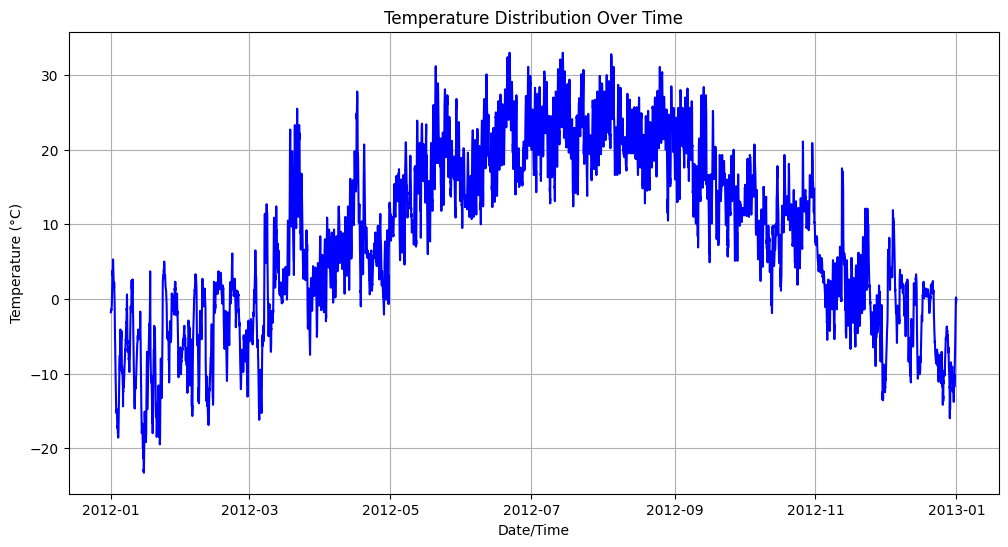

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Temp_C'], color='blue')
plt.title('Temperature Distribution Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


It appears that the initial three months of 2012 experienced notably cold temperatures, followed by a gradual and consistent rise in temperature from March to September. Notably, September stands out as a month with the highest increase in temperature. As the year progresses into the last three months, a return to colder temperatures is observed.

## CALCULATING THE AVERAGE TEMPERATURE OF EACH QUARTER

In [ ]:

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df.set_index('Date/Time', inplace=True)

# Resample the data into quarters and calculate the mean temperature for each quarter
average_temperatures = df['Temp_C'].resample('Q').mean()

# Print the average temperatures for each quarter
print("Average Temperatures for Each Quarter:")
print(average_temperatures)


Average Temperatures for Each Quarter:
Date/Time
2012-03-31    -2.794322
2012-06-30    14.479899
2012-09-30    20.561775
2012-12-31     2.880978
Freq: Q-DEC, Name: Temp_C, dtype: float64


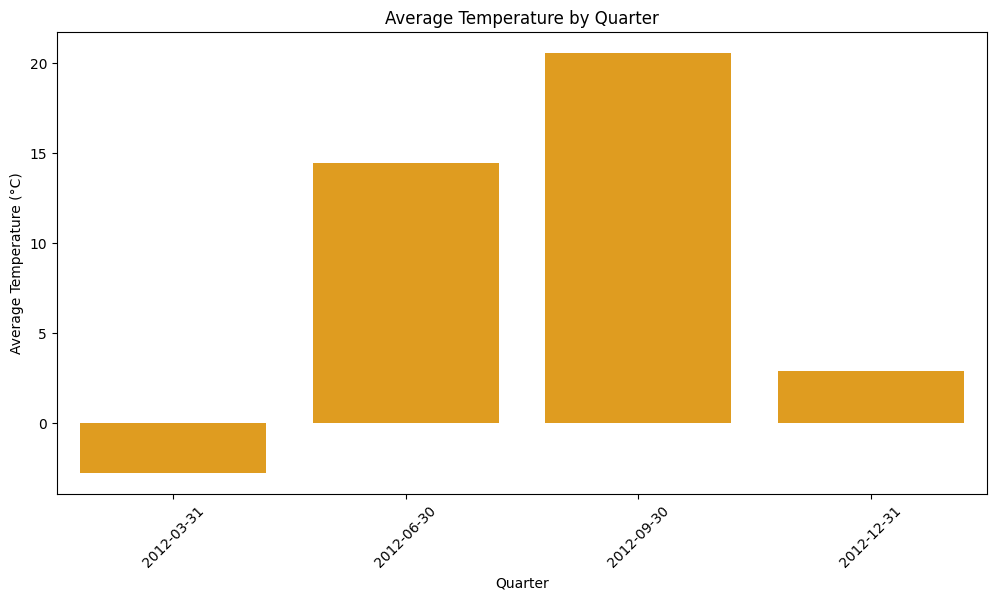

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Resample the data into quarters and calculate the mean temperature for each quarter
df_quarters = df['Temp_C'].resample('Q').mean()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=df_quarters.index, y=df_quarters, color='orange')
plt.title('Average Temperature by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()




The first quarter is notably cold, recording the lowest temperatures of the year. The average temperature of -2.794322 underscores the harsh cold weather during this period.

The second quarter sees a temperature increase, indicating favorable weather conditions with an average temperature of 14.479899.

The third quarter experiences a further rise in temperature, averaging 20.561775. The highest temperature of the year is also recorded during this period, emphasizing predominantly clear weather conditions.

However, in the last quarter, there is a rapid temperature decrease. The highest temperature in this quarter is around 18 degrees Celsius, with an average temperature of 2.880978.

## RECCOMMENDATIONS BASED ON TEMPORAL ANALYSES



### First Quarter:
- **Flight Schedules:** Airlines operating in this quarter may need to be prepared for challenging weather conditions, including potential cold temperatures and adverse weather events. Flight delays or cancellations due to snow or icy conditions could be a consideration.
  
- **Dress Code:** Residents should dress warmly, with layers to protect against the cold. Airlines may advise passengers to carry extra layers or blankets, especially for early morning or late-night flights.

### Second Quarter:
- **Flight Schedules:** Generally, this quarter suggests more favorable weather conditions. Airlines may experience fewer disruptions due to weather, leading to more reliable flight schedules.
  
- **Dress Code:** Passengers can expect milder temperatures. While still comfortable, it's advisable to dress in layers as temperatures can vary, especially during early morning or evening flights.

### Third Quarter:
- **Flight Schedules:** This quarter likely offers excellent flying conditions with clear weather. Airlines may experience minimal weather-related disruptions, contributing to reliable flight schedules.
  
- **Dress Code:** Residents can enjoy warmer temperatures. Light and breathable clothing would be suitable, but it's advisable to have a light jacket or sweater for cooler evenings.

### Fourth Quarter:
- **Flight Schedules:** Airlines should be prepared for potential disruptions due to decreasing temperatures, especially in the latter part of the quarter. Flight delays or cancellations due to winter weather conditions may occur.
  
- **Dress Code:** Passengers should dress warmly, with heavier clothing to combat colder temperatures. Airlines may recommend or provide blankets for added comfort during flights.

Adjustments to flight schedules and dress code should be made based on more specific local weather forecasts, but these general considerations can provide a starting point for planning in each quarter.

HUMIDITY ANALYSIS

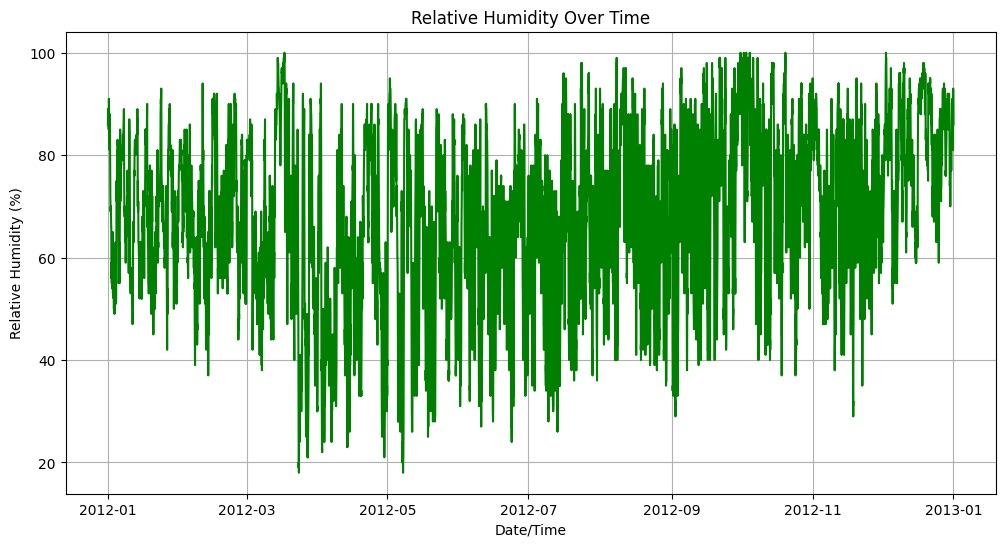

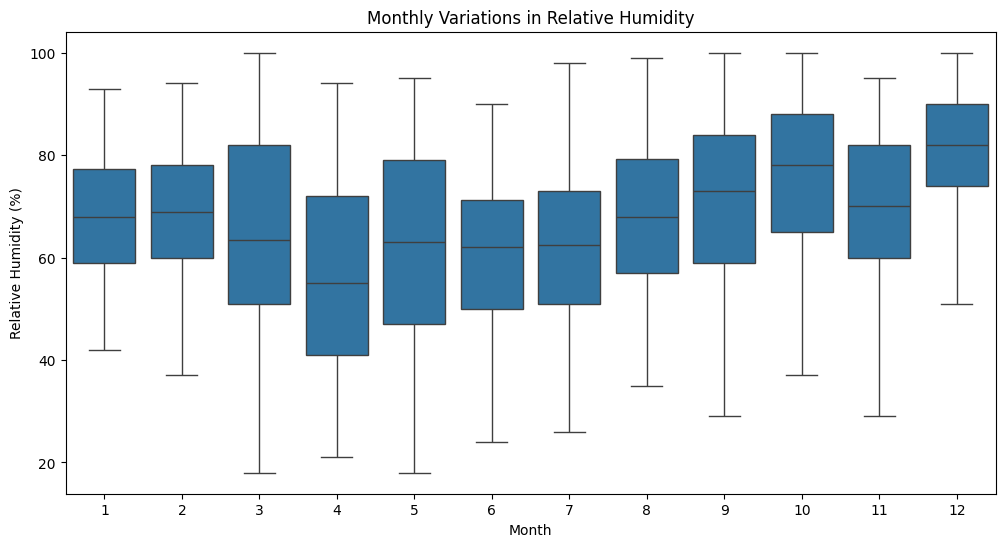

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plotting the relative humidity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Rel Hum_%'], color='green')
plt.title('Relative Humidity Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

# Analyzing variations in relative humidity
plt.figure(figsize=(12, 6))
sns.boxplot(x=df.index.month, y=df['Rel Hum_%'])
plt.title('Monthly Variations in Relative Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.show()


In January, relative humidity ranges from a moderate 40% to 90%, with the majority of readings falling between 58% and 75%. February exhibits a similar pattern, ranging from 35% to 92%, with most readings aligning with those observed in January. March shows a wider range, from 18% to 100%, with most readings concentrated between 55% and 80%.

April sees humidity levels between 20% and 90%, with the bulk of readings falling in the 40% to 75% range. May experiences a range of 18% to 90%, with the majority in the 50% to 80% range. June brings higher humidity around 90%, with readings primarily between 45% and 70%. July mirrors June, occasionally exceeding 100%.

In August, relative humidity varies from 35% to 100%, with the majority falling between 58% and 82%. September records peak readings of 22% to 100%, with most readings around 60% to 85%. October features a range of 35% to 100%, with the majority in the 60% to 80% range.

November sees readings between 30% and 90%, with most falling between 60% and 75%. December's readings range from 50% to 98%, with the majority in the 70% to 85% range.

##Brief Highlights:

January and February: Moderate humidity levels indicate relatively comfortable conditions.


March: Wider range suggests variability, with potential for both dry and humid periods.


June and July: Higher humidity, occasionally exceeding 100%, indicating potentially muggy conditions.


August: Variation in humidity with readings mostly in a moderate range.


September: Peak readings suggest a potential for humid conditions.


November: Moderate humidity levels, indicating relatively comfortable conditions.


December: Humidity remains moderate, suggesting comfortable weather for the month."

##CORRELATION ANALYSIS

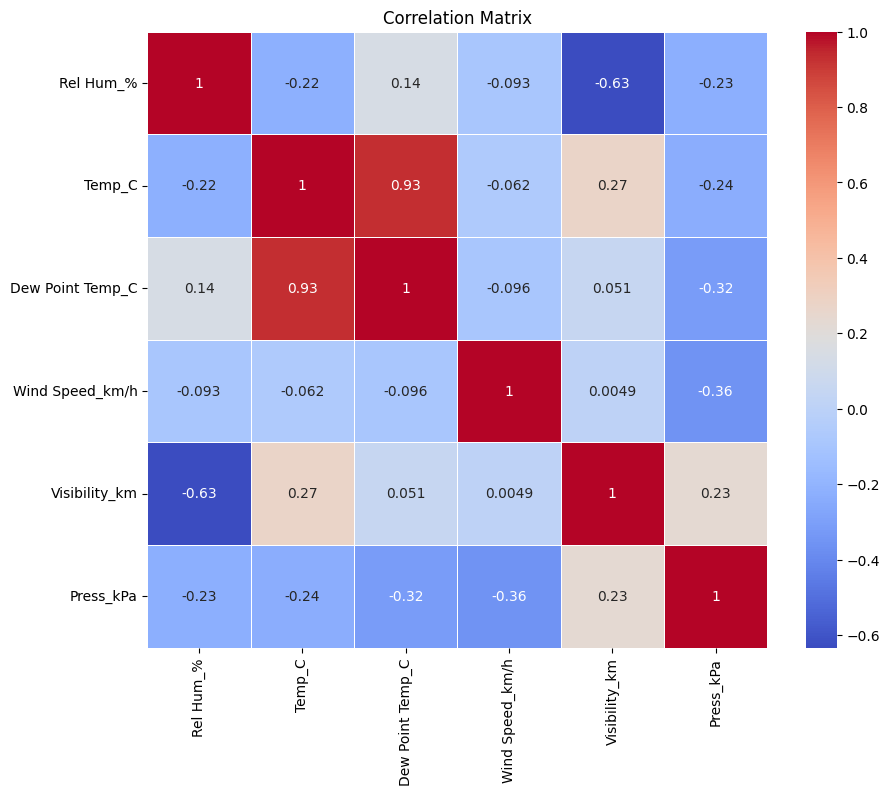

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Calculate correlation matrix
correlation_matrix = df[['Rel Hum_%', 'Temp_C', 'Dew Point Temp_C', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()

# Plotting a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()




There is a negative correlation of -0.63 between relative humidity and visibility.

Interpretation: A negative correlation indicates that as relative humidity increases, visibility tends to decrease. This suggests that higher humidity levels may be associated with reduced visibility, possibly due to the presence of moisture or fog in the air.

There is a correlation of 0.93 between temperature and dew point temperature.

Interpretation: A strong positive correlation of 0.93 suggests that as temperature increases, the dew point temperature also tends to increase. This indicates a close relationship between the two variables, implying that they rise and fall together. High correlation implies that changes in temperature are closely mirrored by changes in dew point temperature.

There is a weak negative correlation of -0.23 between pressure and relative humidity.

Interpretation: A weak negative correlation indicates that as pressure increases, relative humidity tends to decrease slightly. This suggests a subtle inverse relationship between pressure and humidity. However, the correlation is weak, and other factors may have a more dominant influence on humidity levels.

There is a negative correlation of -0.24 between temperature and pressure.

Interpretation: A negative correlation of -0.24 suggests that as temperature increases, pressure tends to decrease slightly. This could be indicative of weather patterns where higher temperatures are associated with lower atmospheric pressure.

There is a negative correlation of -0.32 between dew point temperature and pressure.

Interpretation: A negative correlation of -0.32 implies that as pressure increases, dew point temperature tends to decrease. This relationship suggests that higher atmospheric pressure may be associated with lower dew point temperatures.
There is a negative correlation of -0.36 between wind speed and pressure.

Interpretation: A negative correlation of -0.36 indicates that as wind speed increases, atmospheric pressure tends to decrease. This could be indicative of weather conditions where higher wind speeds are associated with lower pressure.

There is a positive correlation of 0.23 between visibility and pressure.

Interpretation: A positive correlation of 0.23 suggests that as pressure increases, visibility also tends to increase. This implies that higher atmospheric pressure may be associated with clearer visibility, possibly due to the absence of certain weather phenomena like fog or precipitation.

### CONCLUSION
Understanding these correlations helps in predicting and understanding weather patterns. For example, a strong positive correlation between temperature and dew point temperature suggests that when it gets warmer, the air can hold more moisture. Negative correlations with pressure indicate potential connections between atmospheric conditions, temperature, and visibility. These insights contribute to a better understanding of how different weather variables influence each other.

## WIND SPEED

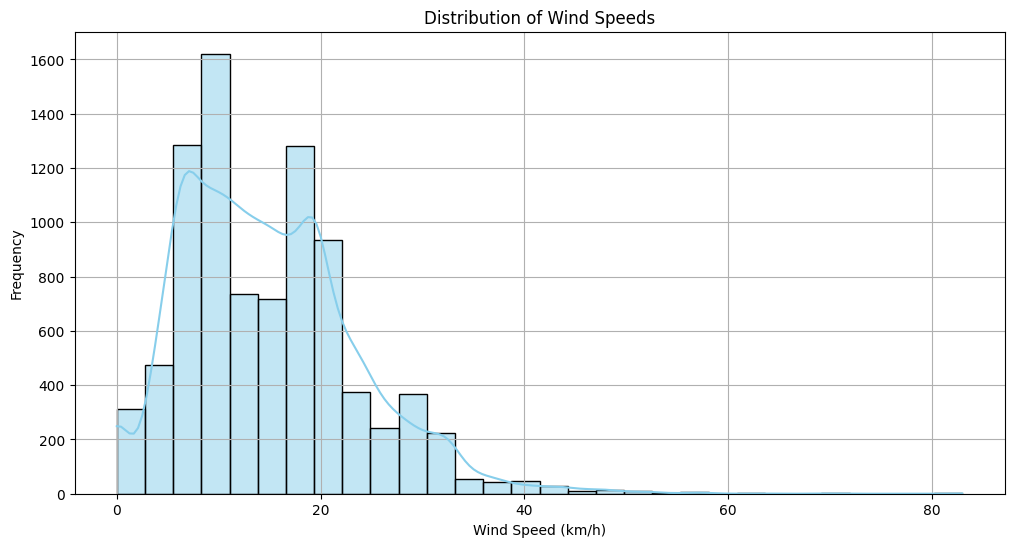

Periods of High Wind Activity:
                     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Date/Time                                                                   
2012-01-18 01:00:00     3.7              -2.1         66               83   

                     Visibility_km  Press_kPa        Weather  
Date/Time                                                     
2012-01-18 01:00:00           25.0      98.36  Mostly Cloudy  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plotting the distribution of wind speeds
plt.figure(figsize=(12, 6))
sns.histplot(df['Wind Speed_km/h'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Identify periods of high wind activity
high_wind_threshold = 70
high_wind_periods = df[df['Wind Speed_km/h'] > high_wind_threshold]

# Display identified periods of high wind activity
print("Periods of High Wind Activity:")
print(high_wind_periods)


In [ ]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


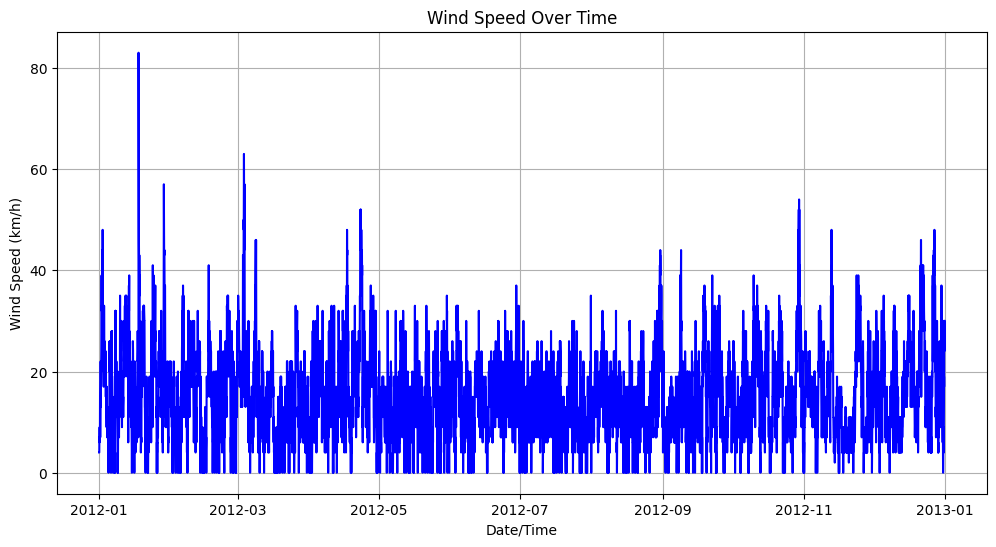

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plotting the wind speed over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Wind Speed_km/h'], color='blue')
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
plt.show()


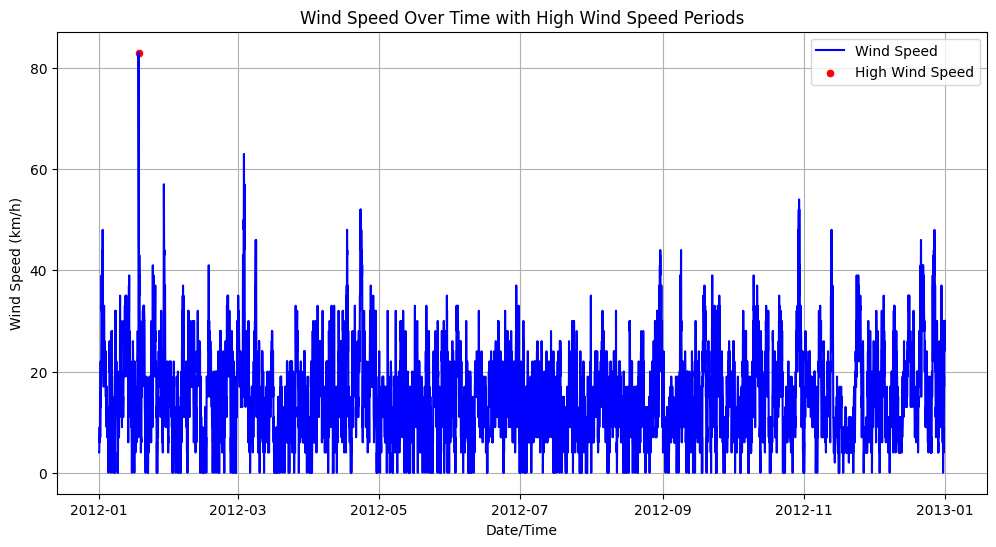

In [ ]:
# Set the threshold for high wind speed
high_wind_threshold = 75

# Identify periods with high wind speed
high_wind_periods = df[df['Wind Speed_km/h'] > high_wind_threshold]

# Plotting with markers for high wind speed periods
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Wind Speed_km/h'], color='blue', label='Wind Speed')
sns.scatterplot(x=high_wind_periods.index, y=high_wind_periods['Wind Speed_km/h'], color='red', label='High Wind Speed')
plt.title('Wind Speed Over Time with High Wind Speed Periods')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.show()


VISIBILITY ANALYSIS

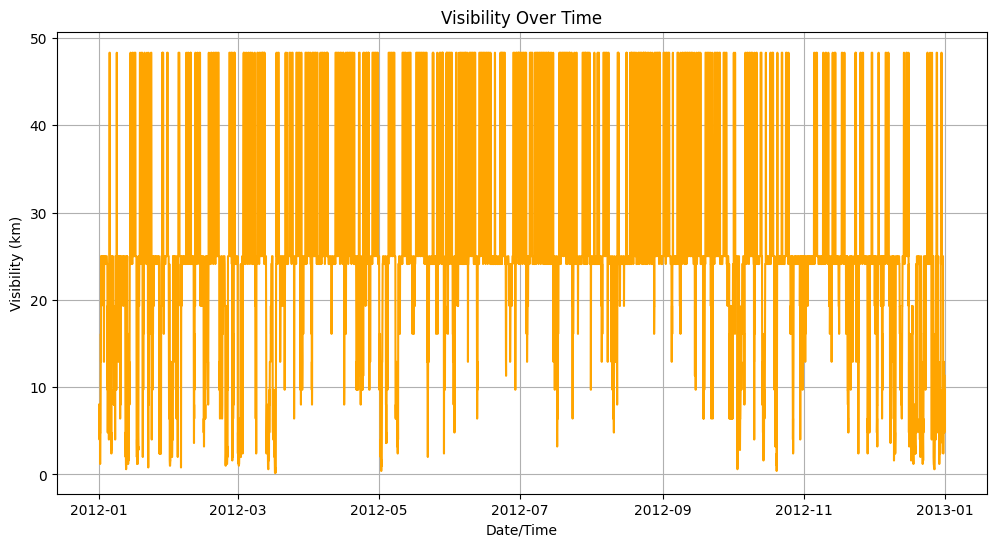

Descriptive Statistics for Visibility:
count    8784.000000
mean       27.664447
std        12.622688
min         0.200000
25%        24.100000
50%        25.000000
75%        25.000000
max        48.300000
Name: Visibility_km, dtype: float64


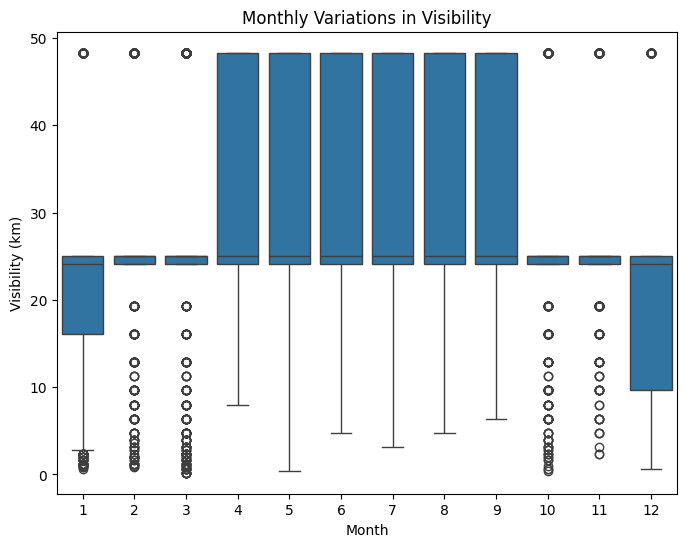

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plotting the variations in visibility over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Visibility_km'], color='orange')
plt.title('Visibility Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Visibility (km)')
plt.grid(True)
plt.show()

# Analyzing descriptive statistics for visibility
visibility_stats = df['Visibility_km'].describe()
print("Descriptive Statistics for Visibility:")
print(visibility_stats)

# Plotting a box plot to visualize the distribution of visibility
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.index.month, y=df['Visibility_km'])
plt.title('Monthly Variations in Visibility')
plt.xlabel('Month')
plt.ylabel('Visibility (km)')
plt.show()


In [ ]:

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Extract the month from the index
df['Month'] = df.index.month

# Calculate the mean visibility for each month
mean_visibility_by_month = df.groupby('Month')['Visibility_km'].mean()

# Print the mean visibility for each month
print("Mean Visibility for Each Month:")
print(mean_visibility_by_month)


Mean Visibility for Each Month:
Month
1     22.100269
2     25.182184
3     26.177957
4     31.777083
5     29.418548
6     32.104167
7     33.655108
8     30.192608
9     30.603472
10    25.111022
11    26.077083
12    19.733199
Name: Visibility_km, dtype: float64


The mean visibility values for each month provide insights into the overall visibility conditions throughout the year. Here's an easy explanation of the visibility patterns across the months:

1. **January (Month 1):** With a mean visibility of 22.1 km, January starts the year with relatively clear visibility, suggesting good visibility conditions for outdoor activities and transportation.

2. **February (Month 2):** Visibility improves slightly in February, reaching an average of 25.18 km. This increase may be indicative of clearer atmospheric conditions compared to January.

3. **March (Month 3):** March sees a further improvement in visibility, with an average of 26.18 km. Clearer skies and improved atmospheric conditions contribute to better visibility during this month.

4. **April (Month 4):** Visibility takes a significant jump in April, reaching 31.78 km. This indicates excellent visibility, making April a month with generally clear atmospheric conditions.

5. **May (Month 5):** Although there is a slight decrease compared to April, May maintains good visibility with an average of 29.42 km. Outdoor visibility remains favorable during this month.

6. **June (Month 6):** June experiences a slight increase in visibility, reaching an average of 32.10 km. The summer season may contribute to these improved visibility conditions.

7. **July (Month 7):** July continues the trend of increasing visibility, with an average of 33.66 km. This suggests excellent visibility during the mid-summer period.

8. **August (Month 8):** August sees a slight decrease in visibility compared to July, averaging 30.19 km. Despite the decrease, visibility remains relatively high, indicating generally clear conditions.

9. **September (Month 9):** September maintains good visibility, with an average of 30.60 km. The transition from summer to fall still provides favorable atmospheric conditions.

10. **October (Month 10):** Visibility experiences a decrease in October, averaging 25.11 km. While slightly lower, visibility remains at a reasonable level for most activities.

11. **November (Month 11):** November sees a slight increase in visibility compared to October, averaging 26.08 km. Fall weather conditions contribute to these visibility patterns.

12. **December (Month 12):** December experiences the lowest visibility of the year, with an average of 19.73 km. Winter weather conditions, including potential fog or precipitation, may contribute to reduced visibility.

In summary, the visibility across the year generally follows a pattern of improvement from the winter months towards the summer months, with variations influenced by seasonal weather conditions.

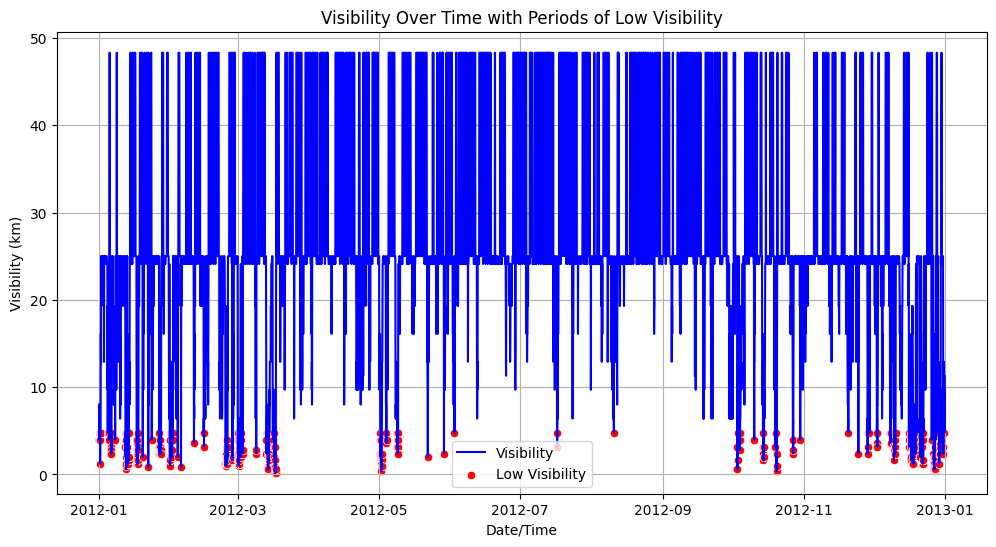

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Define the threshold for low visibility
low_visibility_threshold = 5

# Identify periods with low visibility
low_visibility_periods = df[df['Visibility_km'] < low_visibility_threshold]

# Plotting the entire visibility data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Visibility_km'], color='blue', label='Visibility')

# Highlighting periods of low visibility
sns.scatterplot(x=low_visibility_periods.index, y=low_visibility_periods['Visibility_km'], color='red', label='Low Visibility')

plt.title('Visibility Over Time with Periods of Low Visibility')
plt.xlabel('Date/Time')
plt.ylabel('Visibility (km)')
plt.legend()
plt.grid(True)
plt.show()


During periods of low visibility depicted in the graph, lifestyle adjustments become necessary to navigate the challenges presented by limited sight. Commuting and transportation may be disrupted, leading to cautious driving and altered routes. Outdoor activities and events might be postponed or canceled, prompting individuals to seek indoor alternatives for recreation. Businesses relying on visibility, such as restaurants and cafes, may experience fluctuations in patronage. The aviation industry may face delays, impacting travel plans. Overall, safety precautions become paramount, emphasizing the need for well-lit spaces and visibility aids. These adjustments showcase the adaptability of individuals in ensuring safety and maintaining a semblance of normalcy during adverse weather conditions.

PRESSURE ANALYSIS

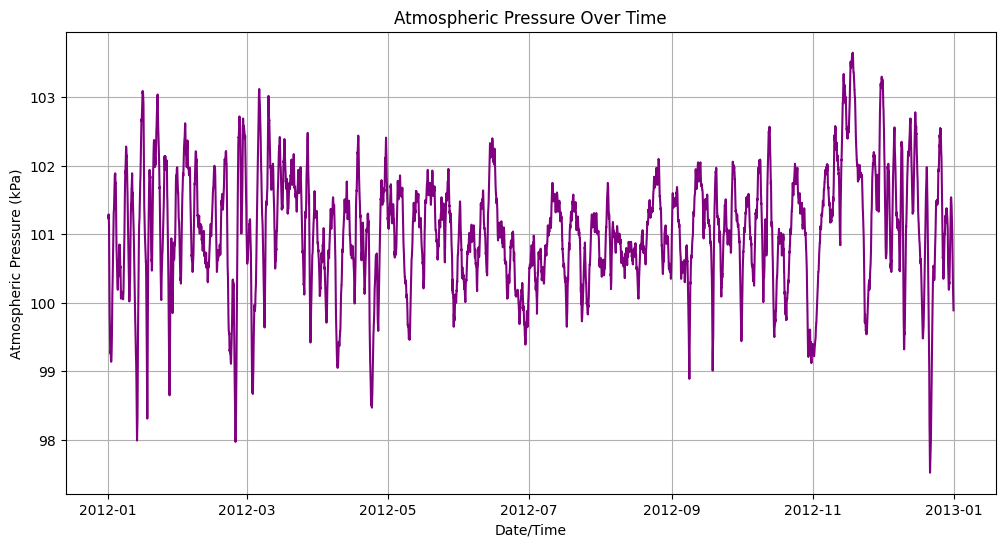

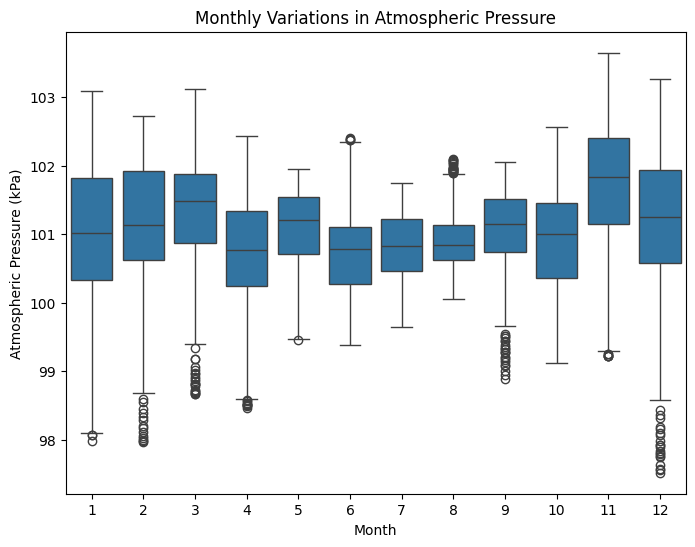

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plotting changes in atmospheric pressure over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Press_kPa'], color='purple')
plt.title('Atmospheric Pressure Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.grid(True)
plt.show()


# Plotting a box plot to visualize the distribution of atmospheric pressure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.index.month, y=df['Press_kPa'])
plt.title('Monthly Variations in Atmospheric Pressure')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.show()


Extremely low atmospheric pressure is observed in January and February, with the lowest pressure recorded in December. Following February, there is an increase in atmospheric pressure, with a slight further increase in April. Another notable increase occurs from May through September, followed by a rapid decrease. Subsequently, there is a slow increase in atmospheric pressure until December.

**Inference:**
The observed pattern suggests a cyclical nature in atmospheric pressure fluctuations throughout the year. The initial low pressures in January and February may be associated with winter weather conditions. The subsequent increase in pressure from February to April might indicate a transition to more stable atmospheric conditions. The notable rise from May to September aligns with the typical progression of atmospheric pressure during the warmer months. The rapid decrease post-September could be linked to changing weather patterns as fall approaches. The slow increase from October to December may reflect a stabilization of atmospheric conditions as the year concludes. Understanding these pressure variations contributes to broader insights into seasonal weather changes.

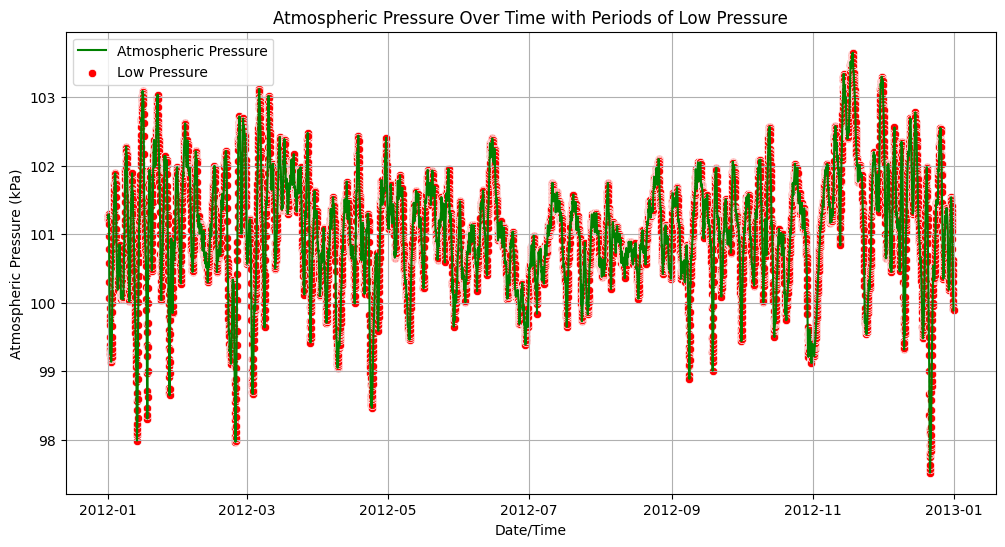

Descriptive Statistics for Low Pressure Periods:
count    8784.000000
mean      101.051623
std         0.844005
min        97.520000
25%       100.560000
50%       101.070000
75%       101.590000
max       103.650000
Name: Press_kPa, dtype: float64
Dates and Times with Low Atmospheric Pressure:
DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date/Time', length=8784, freq=

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Define a threshold for low atmospheric pressure
low_pressure_threshold = 1000

# Identify periods with low atmospheric pressure
low_pressure_periods = df[df['Press_kPa'] < low_pressure_threshold]

# Plotting changes in atmospheric pressure over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Press_kPa'], color='green', label='Atmospheric Pressure')

# Highlighting periods of low atmospheric pressure
sns.scatterplot(x=low_pressure_periods.index, y=low_pressure_periods['Press_kPa'], color='red', label='Low Pressure')

plt.title('Atmospheric Pressure Over Time with Periods of Low Pressure')
plt.xlabel('Date/Time')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.legend()
plt.grid(True)
plt.show()

# Print descriptive statistics for low-pressure periods
low_pressure_stats = low_pressure_periods['Press_kPa'].describe()
print("Descriptive Statistics for Low Pressure Periods:")
print(low_pressure_stats)

# Print specific dates or times associated with low pressure
print("Dates and Times with Low Atmospheric Pressure:")
print(low_pressure_periods.index)


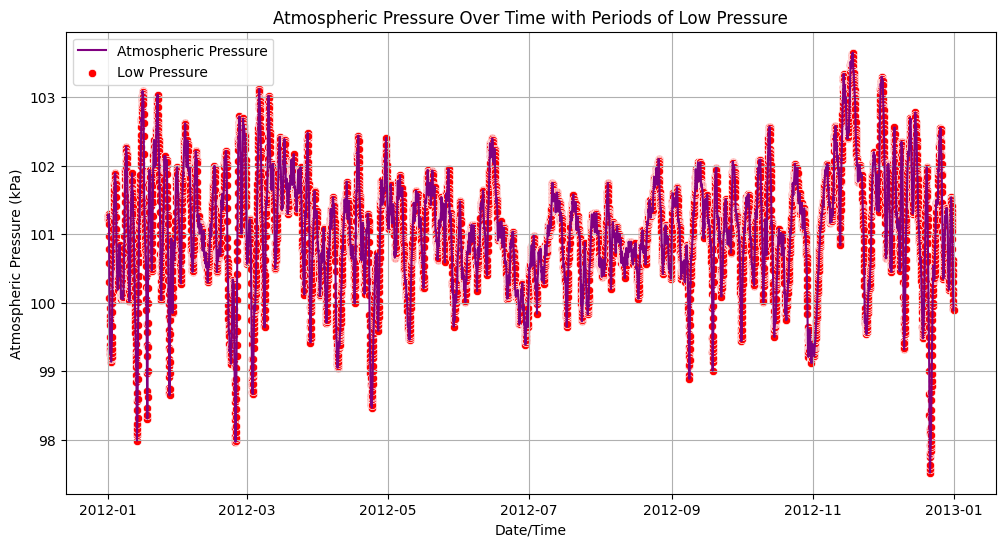

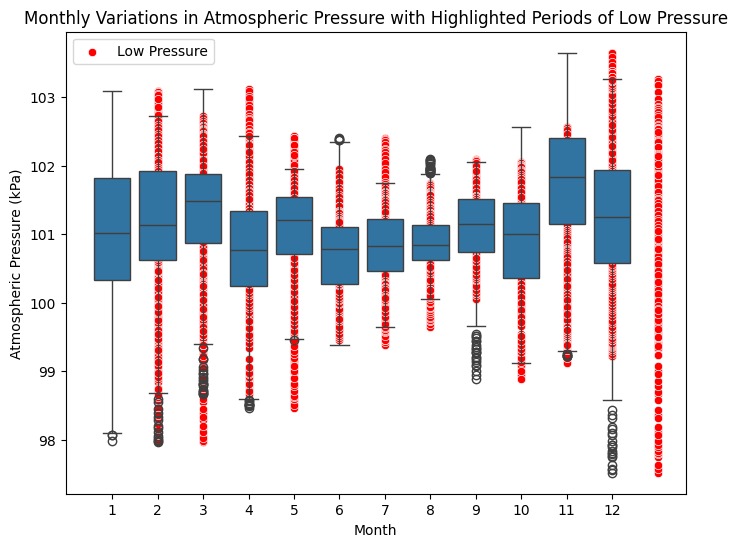

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Define a threshold for low atmospheric pressure
low_pressure_threshold = 1000  # Adjust as needed based on your definition of low pressure

# Identify periods with low atmospheric pressure
low_pressure_periods = df[df['Press_kPa'] < low_pressure_threshold]

# Plotting changes in atmospheric pressure over time with highlighted periods of low pressure
plt.figure(figsize=(12, 6))
sns.lineplot(data=df['Press_kPa'], color='purple', label='Atmospheric Pressure')
sns.scatterplot(x=low_pressure_periods.index, y=low_pressure_periods['Press_kPa'], color='red', label='Low Pressure')
plt.title('Atmospheric Pressure Over Time with Periods of Low Pressure')
plt.xlabel('Date/Time')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting a box plot to visualize the distribution of atmospheric pressure with highlighted periods of low pressure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.index.month, y=df['Press_kPa'])
sns.scatterplot(x=low_pressure_periods.index.month, y=low_pressure_periods['Press_kPa'], color='red', label='Low Pressure')
plt.title('Monthly Variations in Atmospheric Pressure with Highlighted Periods of Low Pressure')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure (kPa)')
plt.legend()
plt.show()


/tmp/ipykernel_729/1190311447.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')


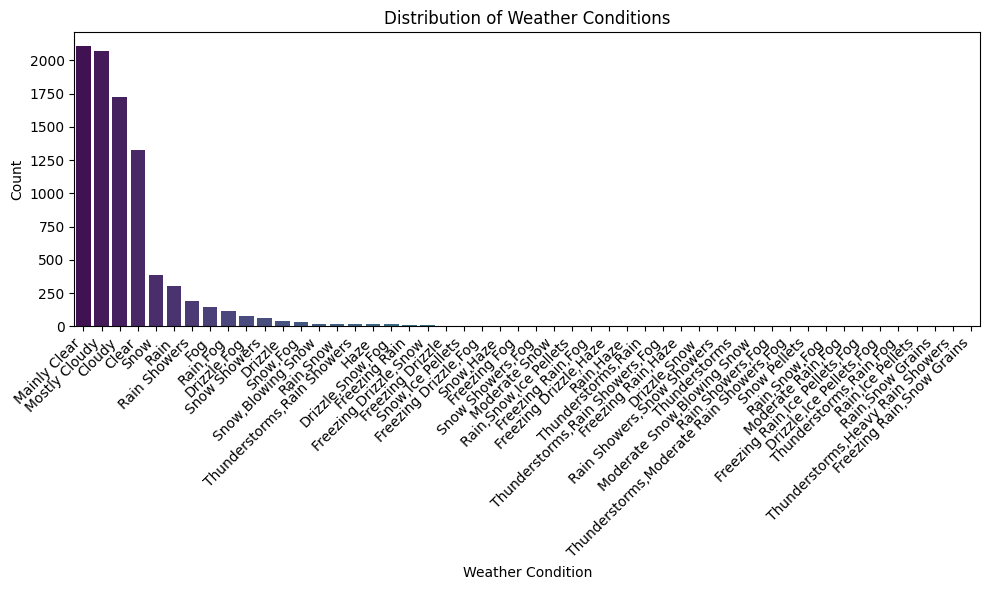

Occurrences of Different Weather Conditions:
Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow              

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of different weather conditions
weather_counts = df['Weather'].value_counts()

# Plot a bar chart to visualize the distribution of weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Print the counts of each weather condition
print("Occurrences of Different Weather Conditions:")
print(weather_counts)


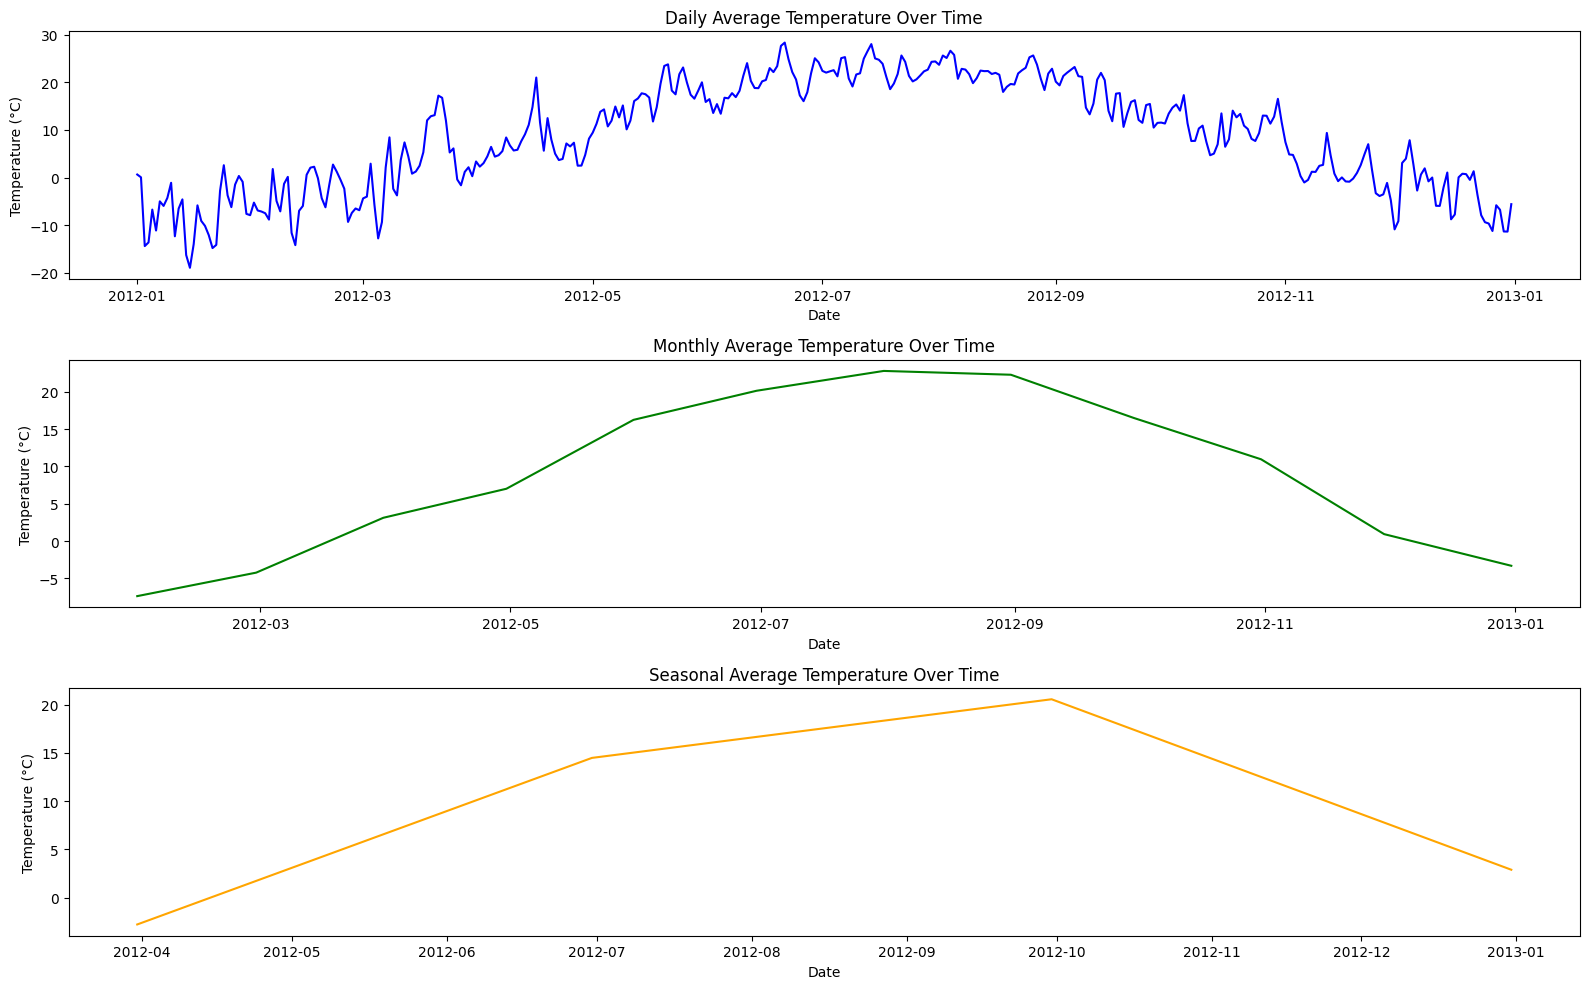

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Resample data to daily, monthly, and seasonal averages
daily_avg = df['Temp_C'].resample('D').mean()
monthly_avg = df['Temp_C'].resample('M').mean()
seasonal_avg = df['Temp_C'].resample('Q-DEC').mean()

# Plotting daily, monthly, and seasonal trends
plt.figure(figsize=(16, 10))

# Daily trend
plt.subplot(3, 1, 1)
sns.lineplot(data=daily_avg, color='blue')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Monthly trend
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_avg, color='green')
plt.title('Monthly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

# Seasonal trend
plt.subplot(3, 1, 3)
sns.lineplot(data=seasonal_avg, color='orange')
plt.title('Seasonal Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()


Identifying recuring patterns and trends

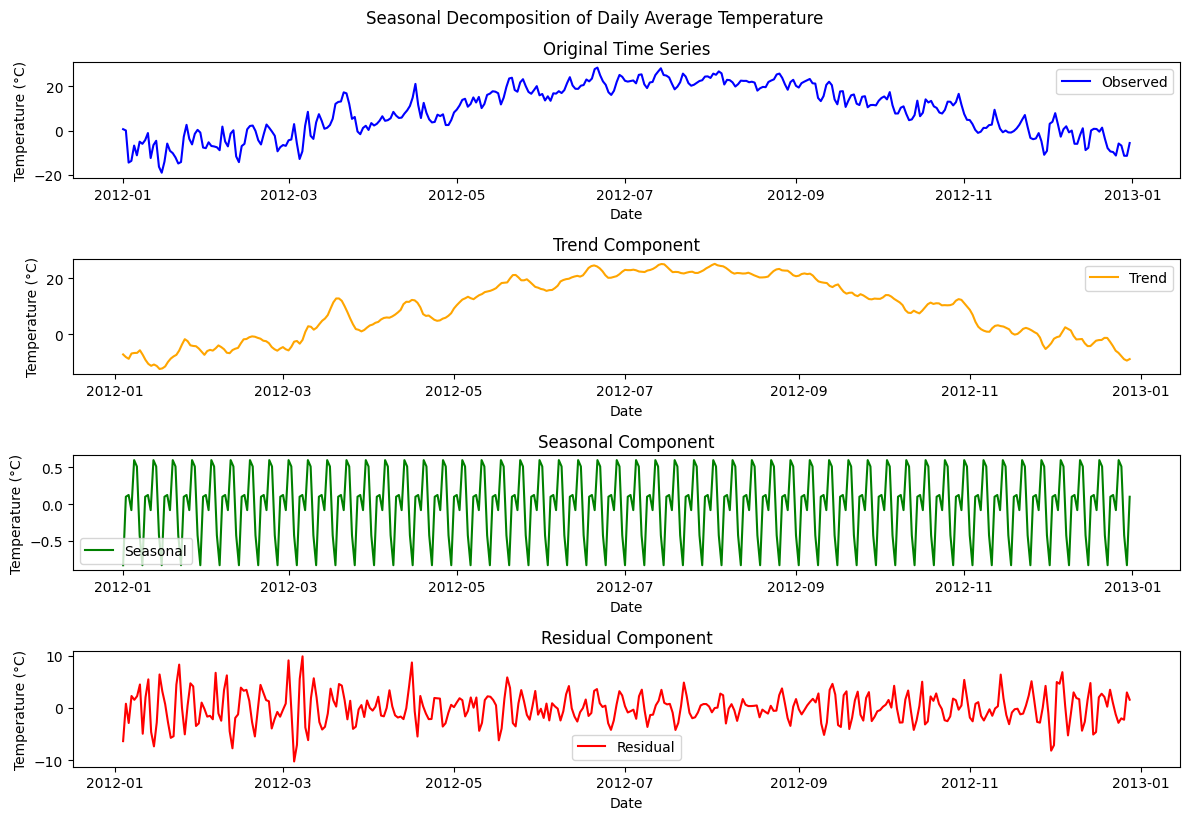

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Resample data to daily averages
daily_avg = df['Temp_C'].resample('D').mean()

# Decompose the time series
result = seasonal_decompose(daily_avg, model='additive')

# Plot the decomposed components with improved x-axis labels
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed', color='blue')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Daily Average Temperature', y=1.02)
plt.show()


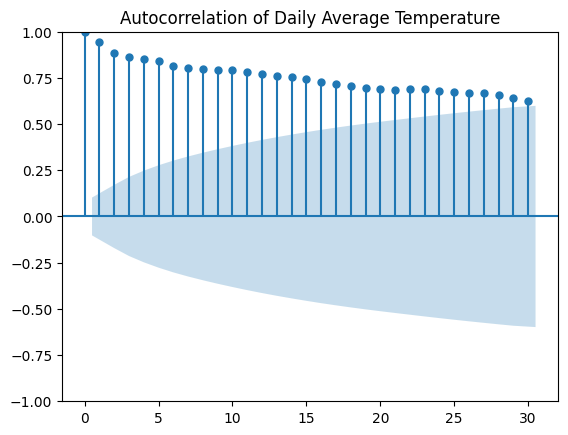

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function
plot_acf(daily_avg, lags=30)
plt.title('Autocorrelation of Daily Average Temperature')
plt.show()


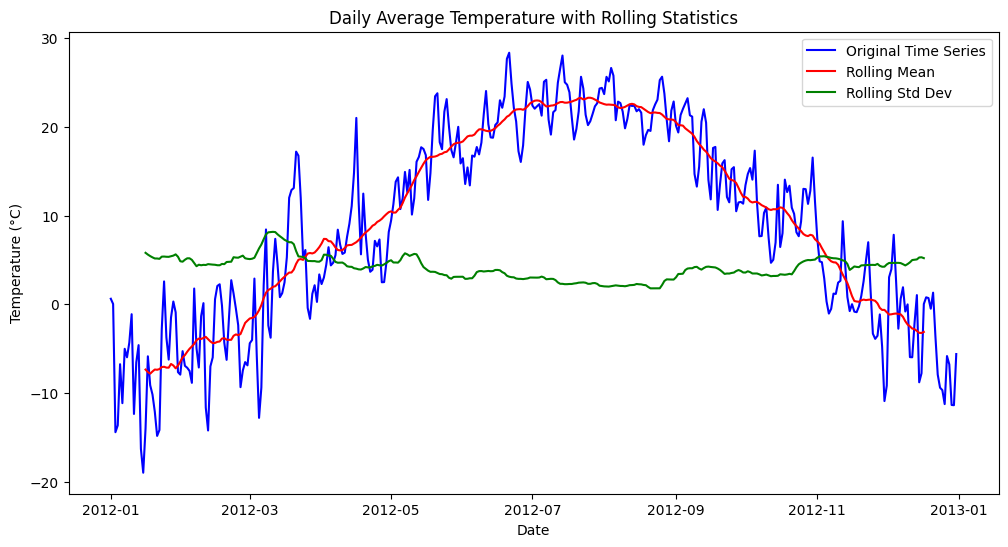

In [ ]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = daily_avg.rolling(window=30, center=True).mean()
rolling_std = daily_avg.rolling(window=30, center=True).std()

# Plot original time series and rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(daily_avg, label='Original Time Series', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Daily Average Temperature with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()





Develop machine learning models to predict specific weather conditions or patterns. For instance, you could build a model to predict rainy days based on other weather features.






INVESTIGATING TRANSITIONS BETWEEN WEATHER CONDITIONS

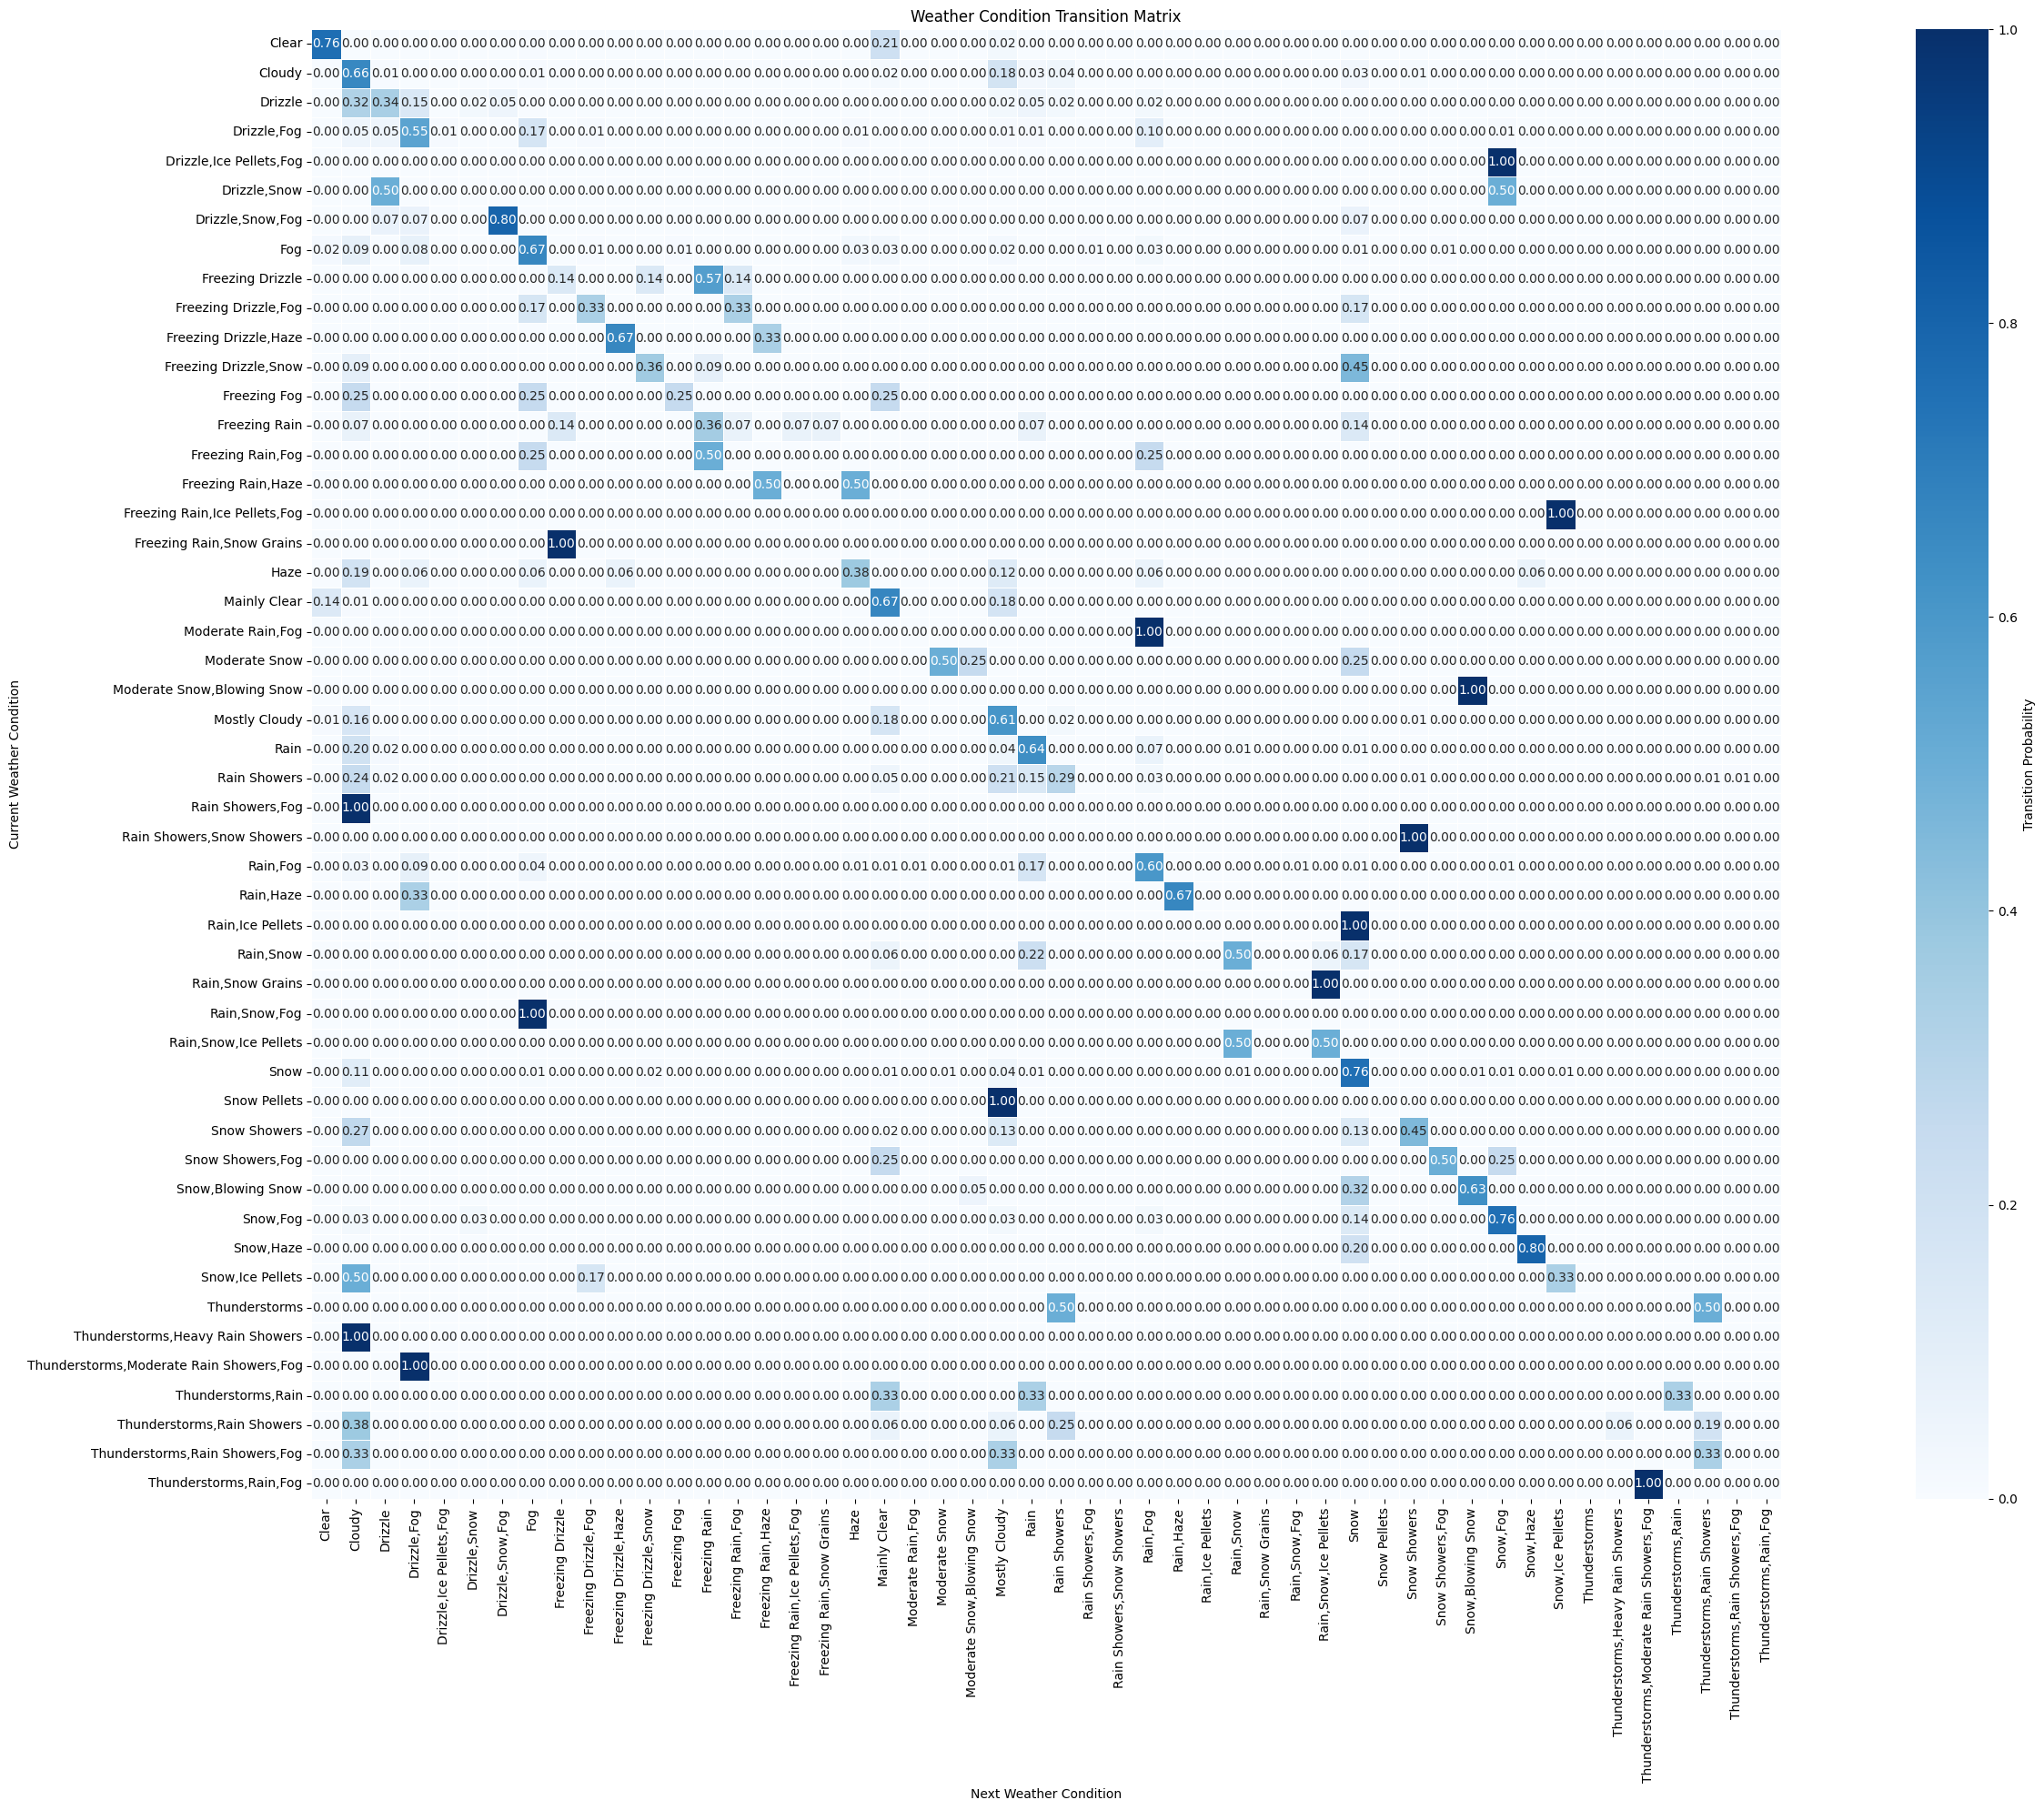

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Create a new column 'Next_Weather' to represent the next day's weather
df['Next_Weather'] = df['Weather'].shift(-1)

# Drop the last row since there's no 'next' day for it
df = df.dropna()

# Create a transition matrix
transition_matrix = pd.crosstab(df['Weather'], df['Next_Weather'], normalize='index')

# Plot the transition matrix as a heatmap with increased figure size and adjusted aspect ratio
plt.figure(figsize=(30, 20))
sns.heatmap(transition_matrix, cmap='Blues', annot=True, fmt=".2f", cbar_kws={'label': 'Transition Probability'},
            linewidths=.5, square=True, annot_kws={"size": 10})
plt.title('Weather Condition Transition Matrix')
plt.xlabel('Next Weather Condition')
plt.ylabel('Current Weather Condition')
plt.tight_layout()
plt.show()


In [ ]:

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Define the date ranges for specific events or holidays
# For example, let's consider New Year's Day and Independence Day
new_years_day_range = ('2012-01-01', '2012-01-01')
independence_day_range = ('2012-07-04', '2012-07-04')

# Filter the dataframe for the specified date ranges
new_years_day_weather = df.loc[new_years_day_range[0]:new_years_day_range[1]]
independence_day_weather = df.loc[independence_day_range[0]:independence_day_range[1]]

# Print summary statistics or perform additional analysis on the filtered data
print("Weather during New Year's Day:")
print(new_years_day_weather['Weather'].value_counts())

print("\nWeather during Independence Day:")
print(independence_day_weather['Weather'].value_counts())


Weather during New Year's Day:
Weather
Fog                     14
Cloudy                   4
Freezing Drizzle,Fog     2
Rain                     2
Mostly Cloudy            1
Rain Showers             1
Name: count, dtype: int64

Weather during Independence Day:
Weather
Cloudy                        11
Mostly Cloudy                  4
Mainly Clear                   4
Clear                          2
Rain                           1
Thunderstorms                  1
Thunderstorms,Rain Showers     1
Name: count, dtype: int64


CLUSTERING ANALYSIS

/home/nintech/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nintech/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nintech/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/nintech/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

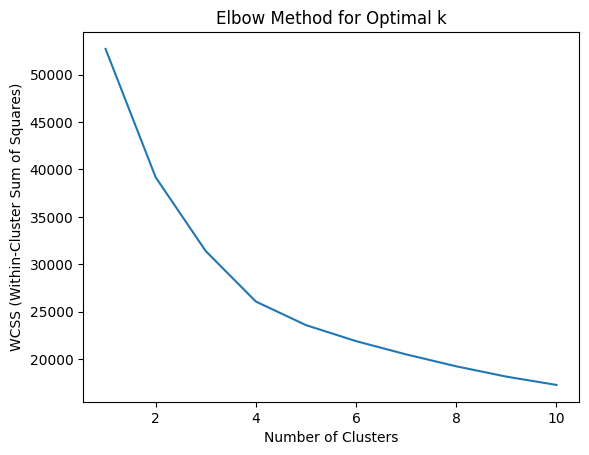

/home/nintech/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


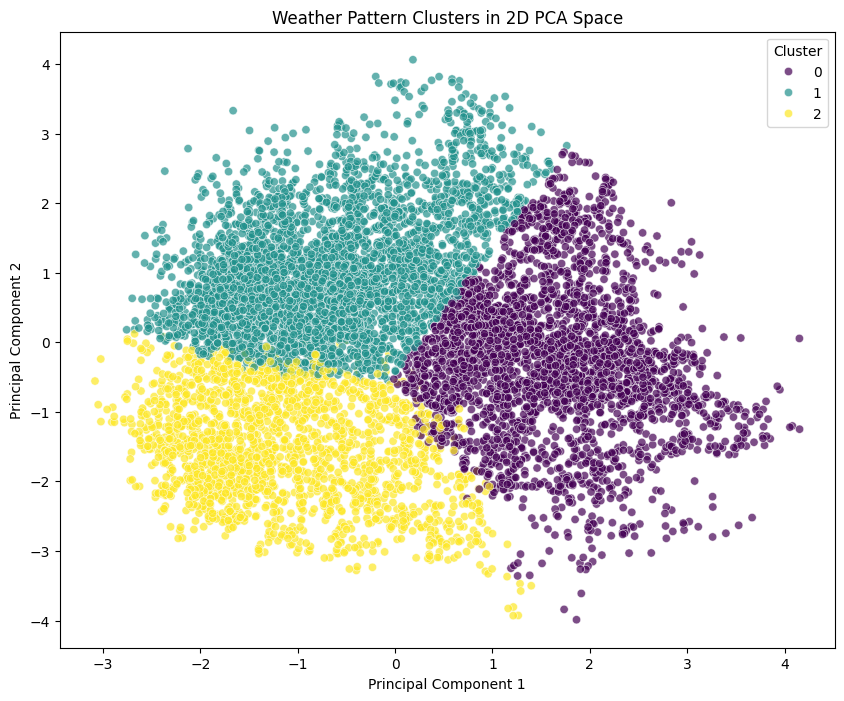

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Select relevant weather features for clustering
weather_features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[weather_features])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (k)
optimal_k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the clusters in 2D PCA space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', legend='full', alpha=0.7)
plt.title('Weather Pattern Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/home/nintech/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Average Values for Each Cluster:
            Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Cluster                                                            
0        -3.612860         -8.944548  67.915147        14.394432   
1        13.838502          9.632023  76.973181        15.307223   
2        18.024538          6.575312  48.745127        15.095452   

         Visibility_km   Press_kPa  
Cluster                             
0            24.654955  101.562446  
1            21.251806  100.557337  
2            44.270965  101.211709  


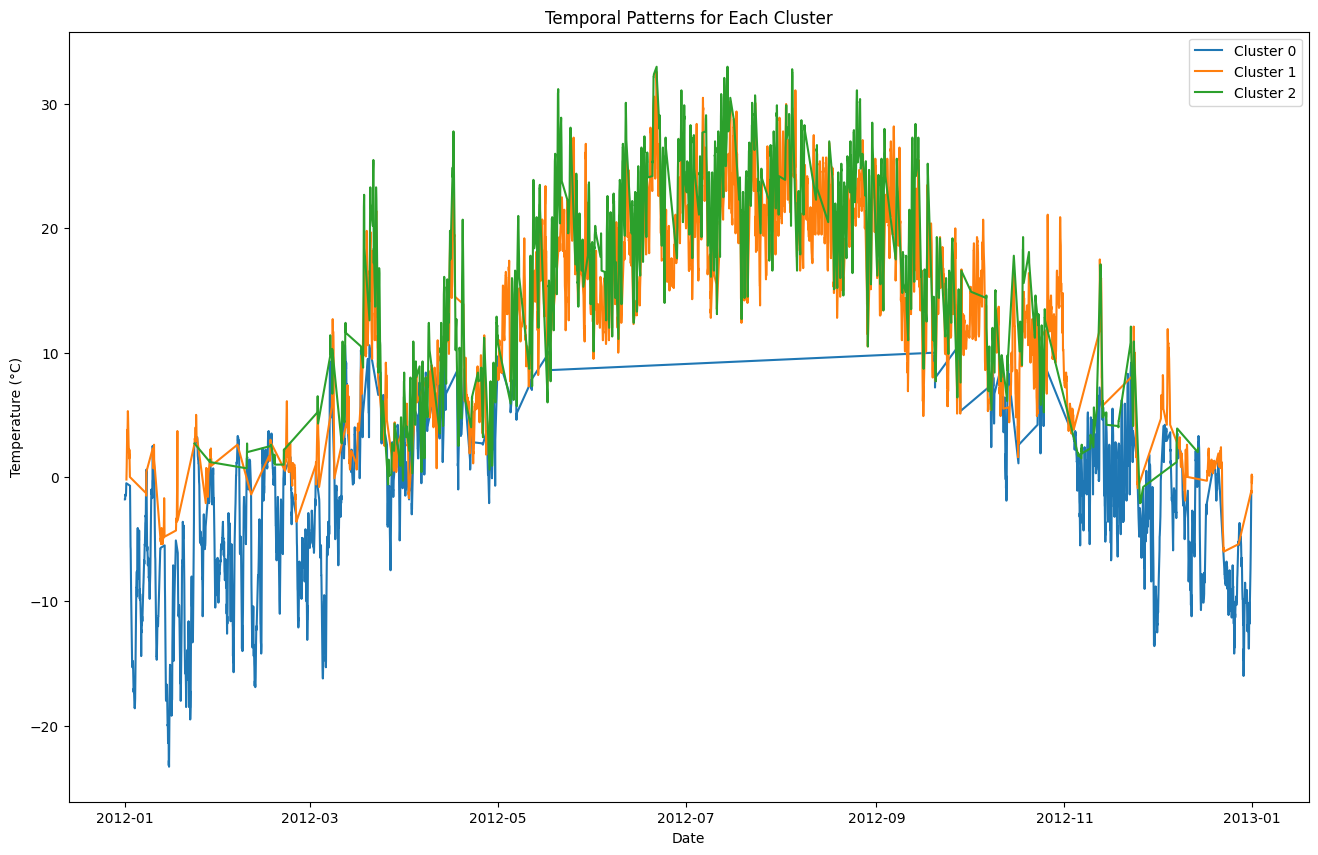

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Group data by 'Cluster' and calculate the average values for each cluster
cluster_means = df.groupby('Cluster')[weather_features].mean()

# Print the average values for each cluster
print("Average Values for Each Cluster:")
print(cluster_means)

# Visualize temporal patterns for each cluster
plt.figure(figsize=(16, 10))
for cluster in range(optimal_k):  # Assuming 'optimal_k' is the number of clusters
    cluster_data = df[df['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Temp_C'], label=f'Cluster {cluster}')

plt.title('Temporal Patterns for Each Cluster')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


ML MODEL FOR PREDICTION

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_weather_model(df, features, target):


    # Drop rows with missing values in the selected features and target
    df = df.dropna(subset=features + [target])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], df[target], test_size=0.2, random_state=42
    )

    # Initialize and train a machine learning model (Random Forest Classifier as an example)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model (optional)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model Accuracy: {accuracy}")

    return model

def predict_weather_conditions(model, input_data):


    # Make predictions on the input data
    predictions = model.predict(input_data)

    return predictions

def get_user_input_and_predict(model):


    # Get input parameters from the user
    temp_c = float(input("Enter Temperature in Celsius: "))
    dew_point_temp_c = float(input("Enter Dew Point Temperature in Celsius: "))
    rel_humidity = int(input("Enter Relative Humidity (%): "))
    wind_speed_kmh = int(input("Enter Wind Speed in km/h: "))
    visibility_km = float(input("Enter Visibility in km: "))
    press_kpa = float(input("Enter Atmospheric Pressure in kPa: "))

    # Create a DataFrame with user input
    input_data = pd.DataFrame({
        'Temp_C': [temp_c],
        'Dew Point Temp_C': [dew_point_temp_c],
        'Rel Hum_%': [rel_humidity],
        'Wind Speed_km/h': [wind_speed_kmh],
        'Visibility_km': [visibility_km],
        'Press_kPa': [press_kpa],
    })

    # Make predictions
    predicted_weather = predict_weather_conditions(model, input_data)

    return predicted_weather



features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Train the model
trained_model = train_weather_model(df, features, target_column)

# Get user input and make predictions
predicted_weather = get_user_input_and_predict(trained_model)

print("Predicted Weather Condition:", predicted_weather[0])



Model Accuracy: 0.5378486055776892


Enter Temperature in Celsius:  56
Enter Dew Point Temperature in Celsius:  20
Enter Relative Humidity (%):  10
Enter Wind Speed in km/h:  78
Enter Visibility in km:  45
Enter Atmospheric Pressure in kPa:  130


Predicted Weather Condition: Mainly Clear


In [ ]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 335.7 kB/s eta 0:00:0000:0100:25
